# Travelling Salesman Problem (TSP) Example

This example requires you to install _matplotlib_. 

## Loading the libraries

In [1]:
! pip install matplotlib --quiet

In [2]:
from cpmpy import *
import numpy as np
import math

## The TSP

The travelling salesman problem (TSP) asks the following question: Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

Let us take a look on how to solve an instance with 12 cities whose locations are given in the following array, i.e., <code>locations[i]</code> denotes the location of city <code>i</code>.

In [3]:
locations= [
        (288, 149), (288, 129), (270, 133), (256, 141), (256, 163), (246, 157),
        (236, 169), (228, 169), (228, 148), (220, 164), (212, 172), (204, 159)
]

We start by creating a function that builds a distance matrix, whose element <code>distance_matrix[i][j]</code> is the Euclidean distance between cities <code>i</code> and <code>j</code>. 

In [4]:
def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    n_city = len(locations)
    distances = np.zeros((n_city,n_city))
    for from_counter, from_node in enumerate(locations):
        for to_counter, to_node in enumerate(locations):
            if from_counter != to_counter:
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances.astype(int)

In [5]:
distance_matrix = compute_euclidean_distance_matrix(locations)
n_city = len(locations)

## Decision Variables

We define the decision variables as integers in an array <code>x</code>, where <code>x[i]=j</code> means that city <code>j</code> is visited immediately after <code>i</code>.  
Hence each <code>x[i]</code> will take a value of at least 0 and at most <code>n_city-1</code>, with <code>x</code> of length <code>n_city</code>.

In [6]:
x = intvar(0, n_city-1, shape=n_city) 

## Constraints

In order to ensure that all cities are visited and that the resulting route forms a cycle, we only need to use the <code>circuit</code> constraint!  
A <code>circuit(x)</code> constraint holds iff the arcs <code>i → x[i]</code> form
a Hamiltonian circuit: each vertex is visited exactly once.

In [7]:
model = Model(circuit(x))

## Objective

A necessary step before defining the objective function is to ensure that we can index the distance matrix with a variable.   
While this is not allowed for standard numpy arrays, this can be done after converting the array to a cpmpy-numpy array. (See FAQ in [README.md](https://github.com/tias/cppy/blob/master/README.md)).

In [8]:
distance_matrix = cpm_array(distance_matrix)

We define the objective to be the total travel distance, and we wish to minimize it.

In [9]:
travel_distance = sum(distance_matrix[i, x[i]] for i in range(n_city))
model.minimize(travel_distance)

## Solving

We can now combine the constraints and objective in a CP model, and use a solver to solve the problem.

In [10]:
val = model.solve()
print("Dist:",val,"solution:",x.value())

Dist: True solution: [ 1  2  3  8  0  4  5  6 11  7  9 10]


In [11]:
# the solver status can also be checked
print(model.status())

ExitStatus.OPTIMAL (0.030709809 seconds)


The resulting route can be easily decoded by running the following function.

In [12]:
def display(sol):
    x = 0
    msg = "0"
    while sol[x] != 0:
        x = sol[x]
        msg += f" --> {x}"
    print(msg + " --> 0")

display(x.value())

0 --> 1 --> 2 --> 3 --> 8 --> 11 --> 10 --> 9 --> 7 --> 6 --> 5 --> 4 --> 0


Or we can plot it...

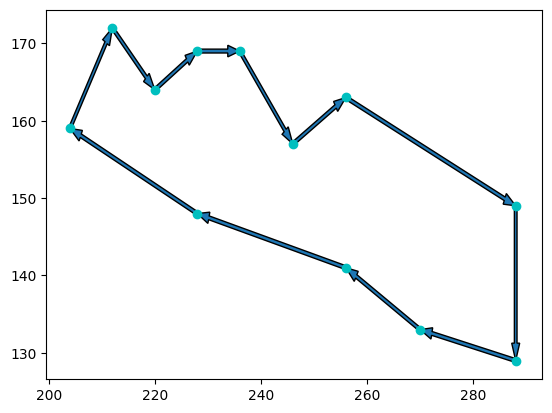

In [13]:
import matplotlib.pyplot as plt

def plot_tsp(coords, sol):
    coords = np.array(coords)
    plt.plot(coords[:,0], coords[:,1], 'co')
    
    for source,dest in enumerate(sol):
        x,y = coords[source]
        dx,dy = coords[dest] - coords[source]
        plt.arrow(x,y,dx,dy, width=0.5, length_includes_head = True)
    
    return plt.show()
    

plot_tsp(locations, x.value())